In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import random
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

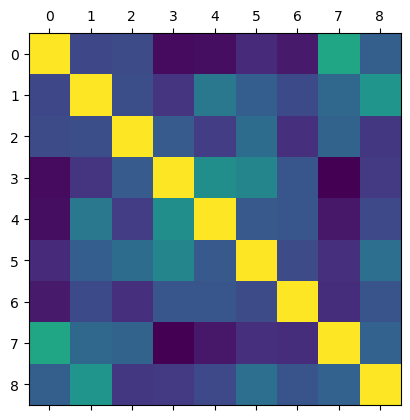

In [8]:
import matplotlib.pyplot as plt

plt.matshow(df.corr())
plt.show()

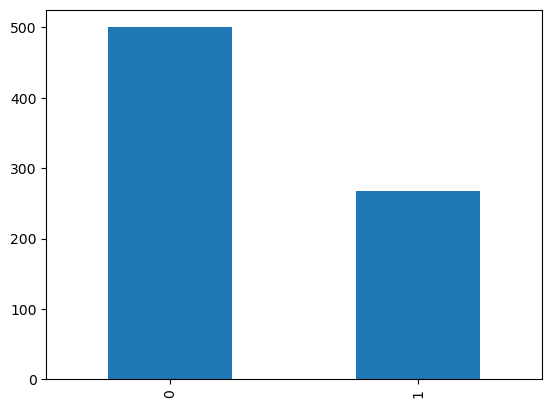

In [9]:
df.Outcome.value_counts().plot(kind='bar');

In [10]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df['Outcome']

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((614, 8), (614,), (154, 8), (154,))

In [13]:
ML_Model = []
accuracy = []
precision = []
recall = []
f1score = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0)
# fit the model 
clf.fit(X_train, y_train)

#predicting the target value from the model for the samples

y_pred = clf.predict(X_test)

nn_acc = accuracy_score(y_pred, y_test)
nn_prec = precision_score(y_pred, y_test,average='weighted')
nn_rec = recall_score(y_pred, y_test,average='weighted')
nn_f1 = f1_score(y_pred, y_test,average='weighted')

In [16]:
storeResults('LogisticRegression',nn_acc,nn_prec,nn_rec,nn_f1)

# Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=10)
# fit the model 
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

dt_acc = accuracy_score(y_pred, y_test)
dt_prec = precision_score(y_pred, y_test,average='weighted')
dt_rec = recall_score(y_pred, y_test,average='weighted')
dt_f1 = f1_score(y_pred, y_test,average='weighted')

In [18]:
storeResults('DecisionTree',dt_acc,dt_prec,dt_rec,dt_f1)

# Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
# fit the model 
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

rf_acc = accuracy_score(y_pred, y_test)
rf_prec = precision_score(y_pred, y_test,average='weighted')
rf_rec = recall_score(y_pred, y_test,average='weighted')
rf_f1 = f1_score(y_pred, y_test,average='weighted')

In [20]:
storeResults('RandomForest',rf_acc,rf_prec,rf_rec,rf_f1)

# SGD

In [21]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier()
# fit the model 
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

lr_acc = accuracy_score(y_pred, y_test)
lr_prec = precision_score(y_pred, y_test,average='weighted')
lr_rec = recall_score(y_pred, y_test,average='weighted')
lr_f1 = f1_score(y_pred, y_test,average='weighted')

In [22]:
storeResults('SGD',lr_acc,lr_prec,lr_rec,lr_f1)

# ExtraTree

In [23]:
from sklearn.tree import ExtraTreeClassifier

clf = ExtraTreeClassifier(random_state=0)
# fit the model 
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

et_acc = accuracy_score(y_pred, y_test)
et_prec = precision_score(y_pred, y_test,average='weighted')
et_rec = recall_score(y_pred, y_test,average='weighted')
et_f1 = f1_score(y_pred, y_test,average='weighted')

In [24]:
storeResults('ExtraTree',et_acc,et_prec,et_rec,et_f1)

# XGBoost

In [25]:
from xgboost import XGBClassifier

clf = XGBClassifier(random_state=0)
# fit the model 
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

xg_acc = accuracy_score(y_pred, y_test)
xg_prec = precision_score(y_pred, y_test,average='weighted')
xg_rec = recall_score(y_pred, y_test,average='weighted')
xg_f1 = f1_score(y_pred, y_test,average='weighted')

In [26]:
storeResults('XGBoost',xg_acc,xg_prec,xg_rec,xg_f1)

# SVM

In [27]:
from sklearn.svm import SVC

clf = SVC(gamma='auto',probability=True)
# fit the model 
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

svm_acc = accuracy_score(y_pred, y_test)
svm_prec = precision_score(y_pred, y_test,average='weighted')
svm_rec = recall_score(y_pred, y_test,average='weighted')
svm_f1 = f1_score(y_pred, y_test,average='weighted')

In [28]:
storeResults('SVM',svm_acc,svm_prec,svm_rec,svm_f1)

# Naive Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()

# fit the model 
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

nb_acc = accuracy_score(y_pred, y_test)
nb_prec = precision_score(y_pred, y_test,average='weighted')
nb_rec = recall_score(y_pred, y_test,average='weighted')
nb_f1 = f1_score(y_pred, y_test,average='weighted')

In [30]:
storeResults('Naive Bayes',nb_acc,nb_prec,nb_rec,nb_f1)

# Voting Classifier

In [31]:
from sklearn.ensemble import VotingClassifier

clf1 = ExtraTreeClassifier(random_state=0)
clf2 = XGBClassifier(random_state=0)
clf3 = RandomForestClassifier()

eclf1 = VotingClassifier(estimators=[('etc', clf1), ('xgb', clf2), ('rf', clf3)], voting='soft')
eclf1.fit(X_train, y_train)
y_pred = eclf1.predict(X_test)

vot_acc = accuracy_score(y_pred, y_test)
vot_prec = precision_score(y_pred, y_test,average='weighted')
vot_rec = recall_score(y_pred, y_test,average='weighted')
vot_f1 = f1_score(y_pred, y_test,average='weighted')

In [32]:
storeResults('Voting Classifier',vot_acc,vot_prec,vot_rec,vot_f1)

# K-Fold Cross-validation

In [33]:
from sklearn.model_selection import cross_val_score
from statistics import stdev

In [34]:
score2 = cross_val_score(eclf1, X_train, y_train, cv=5, scoring='recall')

In [35]:
VC_soft_cv_score = score2.mean()
VC_soft_cv_stdev = stdev(score2)

print('Cross Validation Recall scores are: {}'.format(score2))
print('Average Cross Validation Recall score: ', VC_soft_cv_score)
print('Cross Validation Recall standard deviation: ', VC_soft_cv_stdev)

Cross Validation Recall scores are: [0.69047619 0.58139535 0.53488372 0.55813953 0.5952381 ]
Average Cross Validation Recall score:  0.5920265780730898
Cross Validation Recall standard deviation:  0.05964331663827655


# Stacking Classifier

In [36]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

clf = BaggingClassifier(RandomForestClassifier(),n_estimators=10, random_state=0)

In [37]:
from sklearn.ensemble import StackingClassifier
from lightgbm import LGBMClassifier

tree = DecisionTreeClassifier(random_state = 0)

estimators = [('bag', clf),('dt', tree)]

eclf1 = StackingClassifier(estimators=estimators, final_estimator=LGBMClassifier(n_estimators=10))

eclf1.fit(X_train, y_train)
y_pred = eclf1.predict(X_test)

stac_acc = accuracy_score(y_pred, y_test)
stac_prec = precision_score(y_pred, y_test,average='weighted')
stac_rec = recall_score(y_pred, y_test,average='weighted')
stac_f1 = f1_score(y_pred, y_test,average='weighted')

[LightGBM] [Info] Number of positive: 213, number of negative: 401
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000093 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 206
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.346906 -> initscore=-0.632669
[LightGBM] [Info] Start training from score -0.632669
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [38]:
storeResults('Stacking Classifier',stac_acc,stac_prec,stac_rec,stac_f1)

# K-Fold Cross-validation

In [39]:
score2 = cross_val_score(eclf1, X_test, y_test, cv=5, scoring='recall')

[LightGBM] [Info] Number of positive: 44, number of negative: 79
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000073 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 44
[LightGBM] [Info] Number of data points in the train set: 123, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.357724 -> initscore=-0.585258
[LightGBM] [Info] Start training from score -0.585258
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

In [40]:
VC_soft_cv_score = score2.mean()
VC_soft_cv_stdev = stdev(score2)

print('Cross Validation Recall scores are: {}'.format(score2))
print('Average Cross Validation Recall score: ', VC_soft_cv_score)
print('Cross Validation Recall standard deviation: ', VC_soft_cv_stdev)

Cross Validation Recall scores are: [0.36363636 0.45454545 0.54545455 0.72727273 0.81818182]
Average Cross Validation Recall score:  0.5818181818181818
Cross Validation Recall standard deviation:  0.1885131032120702


# Comparison

In [41]:
#creating dataframe
import pandas as pd
import numpy as np
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1score,
                        'Recall'   : recall,
                        'Precision': precision,
                                                
                      })

In [42]:
result

,ML Model,Accuracy,f1_score,Recall,Precision
0,LogisticRegression,0.753,0.752,0.753,0.752
1,DecisionTree,0.747,0.743,0.747,0.745
2,RandomForest,0.753,0.753,0.753,0.753
3,SGD,0.656,0.736,0.656,0.885
4,ExtraTree,0.714,0.711,0.714,0.711
5,XGBoost,0.688,0.684,0.688,0.685
6,SVM,0.643,0.783,0.643,1.000
7,Naive Bayes,0.766,0.765,0.766,0.764
8,Voting Classifier,0.747,0.745,0.747,0.745
9,Stacking Classifier,0.779,0.781,0.779,0.784


# Graph

In [43]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Accuracy

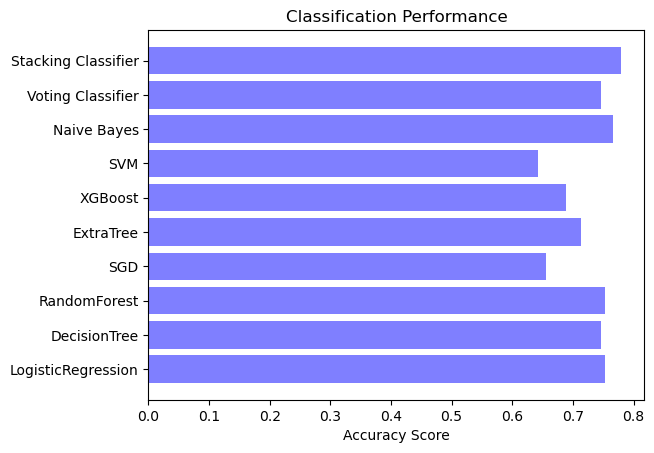

In [44]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

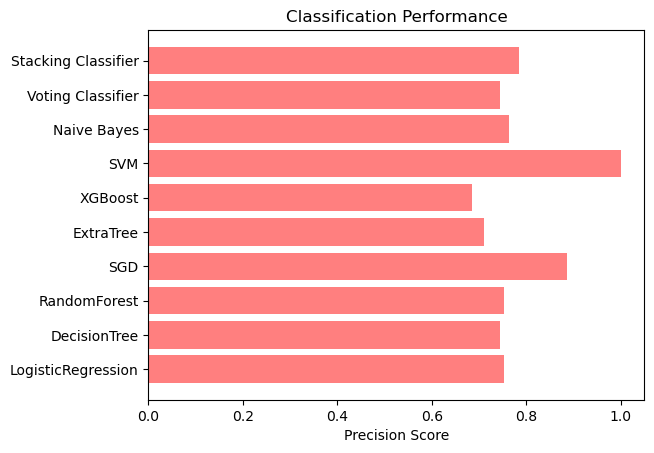

In [45]:
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

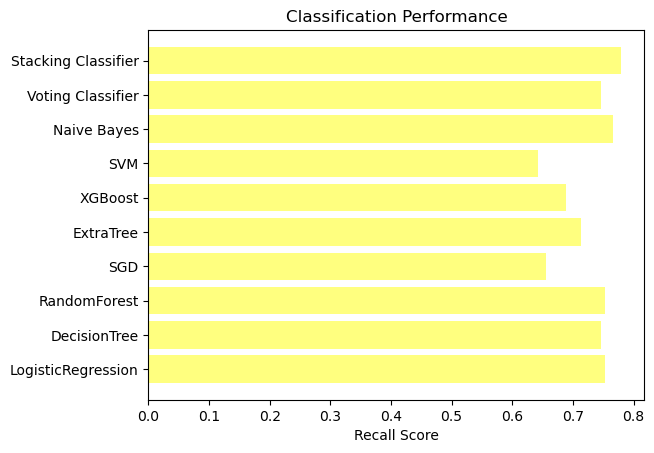

In [46]:
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 Score

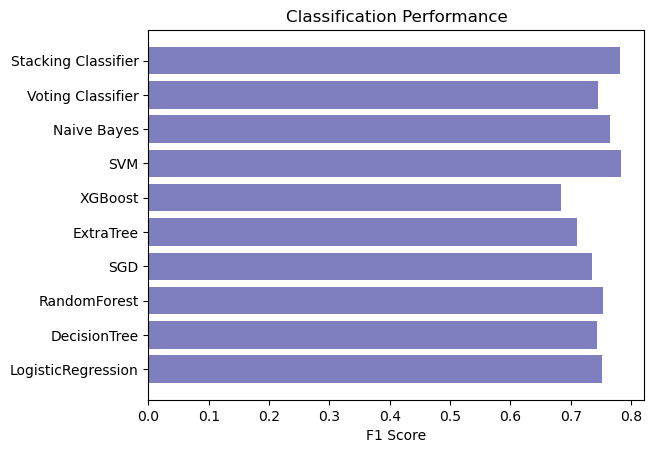

In [47]:
plt2.barh(y_pos, f1score, align='center', alpha=0.5,color='navy')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()